In [ ]:
# test.....

# Imports
WIP

In [ ]:
#For imports not in colab by default
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
!pip install shap

In [ ]:
#The basics
import numpy as np
import pandas as pd
import re, string
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import scipy.io
import seaborn as sns

In [ ]:
#NLTK Suite
import nltk
from nltk import FreqDist
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
#Part a).
import vaderSentiment
from transformers import BertTokenizer, BertModel, Trainer, TrainingArguments
import torch

In [ ]:
#Sklearn suite.  SVM's, kmeans clustering, PCA, and LDA. Fill in as needed
import sklearn
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data Importation
WIP

In [ ]:
#General (Put the below here when we are confident the imports work for everyone)

In [ ]:
#So I'm not sure how this generalizes across different sessions, like if I can just share the folder with you
#Or if you have to make your own. We can change this latter if there is a better way to do this.
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
path_transcript = '/content/drive/My Drive/CSCI5622_Final_Project_Datasets/transcripts_with_headers.csv'
transcripts_df = pd.read_csv(path_transcript, encoding='cp1252',header=0)

path_scores = '/content/drive/My Drive/CSCI5622_Final_Project_Datasets/scores.csv'
scores_df = pd.read_csv(path_scores)

path_tucker = '/content/drive/My Drive/CSCI5622_Final_Project_Datasets/turker_scores_full_interview_old.csv'
tucker_df = pd.read_csv(path_tucker)

path_prosodic = '/content/drive/My Drive/CSCI5622_Final_Project_Datasets/prosodic_features.csv'
prosodic_df = pd.read_csv(path_prosodic)

In [ ]:
transcripts_df.head()

Participant                                         Transcript
0          p1  Interviewer: So how are you doing?|Interviewee...
1         p10  Interviewer: So  how you doing?|Interviewee: G...
2         p11  Interviewer: So  tell me about yourself. |Inte...
3         p12  Interviewer: So how are you doing today?|Inter...
4         p13  Interviewer: How are you doing today?|Intervie...

# a).
WIP


In [ ]:
# Plan is at least two methods. Start with Vader, SKlearnVect and potentially Bert

In [ ]:
#This section takes in the trascript, and creates a dictionary for each participant. We can build on this dictionary as we go
#here it adds the transcript, both in full and broken up by speaker interview scores,
#and vader sentiment scores for each component, as well as likely some more information to follow
#including the info for the first, and if applicable, second interviews.
#could add tucker scores or prosodic features later

df_score_trans = pd.merge(transcripts_df, scores_df, on='Participant', how='inner')
participants = {}

for _, row in df_score_trans.iterrows():
    pid = row['Participant']

    base_id = pid.replace('pp', 'p')
    interview_key = 'interview_2' if pid.startswith('pp') else 'interview_1'

    if base_id not in participants:
        participants[base_id] = {}

    # Add this interview’s data
    participants[base_id][interview_key] = {
        'transcript': row['Transcript'],
        'overall': row['Overall'],
        'excited': row['Excited']
    }
#this is the helper function to split the transcript into each speaker
#returns a list with each phrase. Combine the list into one string for full trans.
def split_transcripts(transcript):
    turns = transcript.split('|')

    interviewer_lines = []
    interviewee_lines = []
    clean_lines = []
    for turn in turns:
        turn = turn.strip()
        if turn.lower().startswith("interviewer:"):
            line = turn[len("Interviewer:"):].strip()
            interviewer_lines.append(line)
            clean_lines.append(line)

        elif turn.lower().startswith("interviewee:"):
            line = turn[len("Interviewee:"):].strip()
            interviewee_lines.append(line)
            clean_lines.append(line)
    clean_transcript = ' '.join(clean_lines)
    return interviewer_lines, interviewee_lines, clean_transcript

for pid, pdata in participants.items():
    for interview_key in ['interview_1', 'interview_2']:
        if interview_key in pdata:
            transcript = pdata[interview_key]['transcript']
            interviewer_lines, interviewee_lines, clean_transcript = split_transcripts(transcript)

            pdata[interview_key]['interviewer_lines'] = interviewer_lines
            pdata[interview_key]['interviewee_lines'] = interviewee_lines
            pdata[interview_key]['clean_transcript'] = clean_transcript


In [ ]:
participants['p1']['interview_1'] ['interviewer_lines']

['So how are you doing?',
 'Ok well  so please tell me about yourself.',
 'mhhmm',
 'So please tell me about a time that you demonstrated leadership.',
 'Tell me about a time when your working on a team and faced with a challenge  how did you solve that problem?',
 'uh hun.',
 'Oh yes.  Alright tell me about one of your weaknesses and how you plan to overcome it.',
 'Now why do you think we should hire you?',
 'Well thank you.']

In [ ]:
participants['p1']['interview_1'] ['interviewee_lines']

['Im pretty good.',
 'ok  uhm  so have you looked at my resume or should I  alright  so I guess ah  I am course 6-7 here at M.I.T  ah which is computational biology  so its a mix of computers  science and biology and actually thats where my interest lie in applying like algorithmic kinda software engineering too datasets dealing with genomics and biology.  Uhm some of that activities that you do out side of school  include Camp Kesem which is a summer camp that we run for completely free for kids whose parents have cancer  as well as ah amphibious achievement  which is ah a high school tutoring program for inner city kids in Boston',
 'So ah  my interest kinda laid both in a little bit of the health care  I imagined I was going be a Doctor growing up  and then it came down to the tee and Im like  well I can do engineering and still apply and do the same things and help a lot more people.',
 'Ok  uhm  one of the things we have to do for Camp Kesem is orgin or fundraise all the money to 

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

#Finds the vader sentiment polarity of a list of strings.
#This will work fine for long strings of text, but vader is optimized for sentence-short paragraph length
#Should test this by full, each turn, and each sentence
def vader_sentiment_finder(text,stats=True):
  sentiment_scores = [analyzer.polarity_scores(phrase) for phrase in text]
  stat_vec = []
  std_compound = 0
  coef_var_compound=0

  if (stats == True):
    avg_pos = sum(s['pos'] for s in sentiment_scores) / len(sentiment_scores)
    avg_neg = sum(s['neg'] for s in sentiment_scores) / len(sentiment_scores)
    avg_neut= sum(s['neu'] for s in sentiment_scores) / len(sentiment_scores)

    compound_scores = [s['compound'] for s in sentiment_scores]
    avg_compound = statistics.mean(compound_scores)
    if len(text) >1:
      std_compound = statistics.stdev(compound_scores)
      coef_var_compound = std_compound/avg_compound #ratio of mean to std, might show volitility

    stat_vec = [avg_pos,avg_neg,avg_neut,avg_compound,std_compound,coef_var_compound]
  return(sentiment_scores,stat_vec)

for pid, pdata in participants.items():
    for interview_key in ['interview_1', 'interview_2']:
        if interview_key in pdata:
            interview = pdata[interview_key]
            vader_results = {}

            full_interviewee, stats_interviewee = vader_sentiment_finder(interview.get('interviewee_lines'))
            vader_results['full_interviewee'] = full_interviewee
            vader_results['interviewee_pos_mean'] =stats_interviewee[0]
            vader_results['interviewee_neg_mean'] =stats_interviewee[1]
            vader_results['interviewee_neut_mean'] =stats_interviewee[2]
            vader_results['interviewee_comp_mean'] =stats_interviewee[3]
            vader_results['interviewee__comp_std'] =stats_interviewee[4]
            vader_results['interviewee_comp_coefvar'] =stats_interviewee[5]

            full_interviewer, stats_interviewer = vader_sentiment_finder(interview.get('interviewer_lines'))
            vader_results['full_interviewer'] = full_interviewer
            vader_results['interviewer_pos_mean'] =stats_interviewer[0]
            vader_results['interviewer_neg_mean'] =stats_interviewer[1]
            vader_results['interviewer_neut_mean'] =stats_interviewer[2]
            vader_results['interviewer_comp_mean'] =stats_interviewer[3]
            vader_results['interviewer__comp_std'] =stats_interviewer[4]
            vader_results['interviewer_comp_coefvar'] =stats_interviewer[5]

            full_trans, stats_trans = vader_sentiment_finder([interview.get('clean_transcript')])
            vader_results['full_trans'] = full_trans
            vader_results['trans_pos_mean'] =stats_trans[0]
            vader_results['trans_neg_mean'] =stats_trans[1]
            vader_results['trans_neut_mean'] =stats_trans[2]
            vader_results['trans_comp_mean'] =stats_trans[3]

            interview['vader'] = vader_results


In [ ]:
# That is vader taken care of, save the visualization. Now lets do uninterpretable

In [ ]:
analyzer.polarity_scores("Hello how are you doing today? My day was bad. I did not enjoy my time. It sucked. Woe is me")

{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.8985}

In [ ]:
analyzer.polarity_scores("Hello happy happy joy joy I love my life.")

{'neg': 0.0, 'neu': 0.172, 'pos': 0.828, 'compound': 0.9648}

In [ ]:
analyzer.polarity_scores("I just got rid of my depression")

{'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.5719}

In [ ]:
#Bert Embedding
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.eval();

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def get_bert_embedding(text, max_len):
  tokenized = tokenizer(text, truncation=True, max_length=max_len, padding='max_length', return_tensors='pt')

  with torch.no_grad():
    output = bert_model(**tokenized)

  #gonna do mean pooling
  attention_mask = tokenized['attention_mask']
  token_embeddings = output.last_hidden_state.squeeze(0)

  mask = attention_mask.squeeze(0).unsqueeze(-1).expand(token_embeddings.size()) # fixes shape mismatch error
  masked = token_embeddings * mask #should get ride of padding
  mean_embed = masked.sum(dim=0) / mask.sum()

  return mean_embed.numpy()

In [ ]:
for pid, pdata in tqdm(participants.items()):
    for ikey in ['interview_1', 'interview_2']:
        if ikey in pdata and 'clean_transcript' in pdata[ikey]:
            text = pdata[ikey]['clean_transcript']
            embedding = get_bert_embedding(text, 512)
            pdata[ikey]['bert_embedding'] = embedding

100%|██████████| 69/69 [04:55<00:00,  4.28s/it]


In [ ]:
embedding_list = []
part_list =[]
score_list_overall = []
score_list_excite = []
for pid, pdata in tqdm(participants.items()):
    for ikey in ['interview_1', 'interview_2']:
        if ikey in pdata and 'bert_embedding' in pdata[ikey]:
          embedding_list.append(pdata[ikey]['bert_embedding'])
          part_list.append(f'{pid}_{ikey}')
          score_list_overall.append(pdata[ikey].get('overall'))
          score_list_excite.append(pdata[ikey].get('excited'))


100%|██████████| 69/69 [00:00<00:00, 43259.64it/s]


Explained variance ratio: [0.11234824 0.08735786]


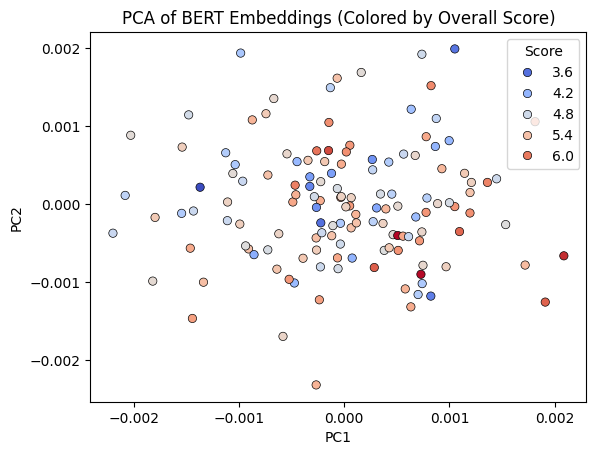

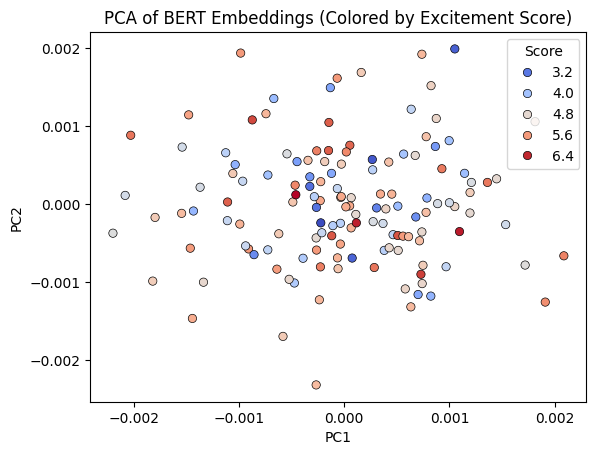

In [ ]:
pca_stack = np.vstack(embedding_list)
pca = PCA(n_components=2)
transformed_stack = pca.fit_transform(pca_stack)
print("Explained variance ratio:", pca.explained_variance_ratio_)

sns.scatterplot(x=transformed_stack[:, 0], y=transformed_stack[:, 1], hue=score_list_overall, palette='coolwarm', edgecolor='k')
plt.title("PCA of BERT Embeddings (Colored by Overall Score)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Score")
plt.show()

sns.scatterplot(x=transformed_stack[:, 0], y=transformed_stack[:, 1], hue=score_list_excite, palette='coolwarm', edgecolor='k')
plt.title("PCA of BERT Embeddings (Colored by Excitement Score)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Score")
plt.show()


# Part b).


In [ ]:
def print_nested_dictionary(data, indent=0):
    for key, value in data.items():
        print('  ' * indent + str(key))
        if isinstance(value, dict):
            print_nested_dictionary(value, indent + 1)
        else:
            print('  ' * (indent + 1) + str(value))
#uncomment below to see dictionary structure
print_nested_dictionary(participants)

Streaming output truncated to the last 5000 lines.
  1.73722001e-04  1.59848001e-04  5.95241494e-04 -6.87672073e-05
  2.69811571e-04 -1.97557292e-05 -5.23010443e-04  1.34500515e-04
  3.37869162e-04 -1.67452599e-04  5.32366626e-04 -6.87540276e-04
  6.01383334e-04 -3.17718514e-04 -2.74892896e-04 -2.03141637e-04
  1.68915954e-04  6.07669179e-04  1.34799164e-04 -2.31723650e-04
 -8.73699100e-05  6.64480904e-04 -5.52399084e-04 -5.01286471e-04
 -8.30742298e-04  1.08827568e-04 -3.86534637e-04  5.62812384e-05
 -2.23351177e-04  4.52085311e-04 -2.93631947e-05 -2.81274464e-04
 -3.21252068e-04  4.73288441e-04 -1.46077173e-05 -1.35669514e-04
  1.38324249e-04 -1.99090529e-04  1.23216305e-04  1.68940300e-04
  2.76837498e-04  2.85866670e-04  6.68761568e-05 -2.46012729e-04
 -1.81944182e-04  6.49583817e-04 -1.05084247e-04  5.19494934e-05
 -3.45094450e-04  4.01338009e-04 -4.42984281e-04 -6.64140040e-04
 -4.68928600e-04 -5.21246460e-04  3.79657402e-04  3.84411163e-04
  9.24839624e-05 -3.00739164e-04  7.299

In [ ]:
#I am going to take the interpretable vader features extracted above, and find the
#mutual information matrix to select variables.
#then, filter out those with low information with the results, and then further
#filter ones very correlated to one another (if needed)
rows = []
for pid, pdata in participants.items():
    for ikey in ['interview_1', 'interview_2']:
        if ikey not in pdata:
            continue
        iv = pdata[ikey] #recall structure
        vader = iv.get('vader', {})
        rows.append({
            'participant': pid,
            'interview': ikey,
            'overall_score': iv.get('overall'),
            'excitement_score': iv.get('excited'),

            'interviewee_pos_mean': vader.get('interviewee_pos_mean'),
            'interviewee_neg_mean': vader.get('interviewee_neg_mean'),
            'interviewee_neut_mean': vader.get('interviewee_neut_mean'),
            'interviewee_comp_mean': vader.get('interviewee_comp_mean'),
            'interviewee__comp_std': vader.get('interviewee__comp_std'),
            'interviewee_comp_coefvar': vader.get('interviewee_comp_coefvar'),

            'interviewer_pos_mean': vader.get('interviewer_pos_mean'),
            'interviewer_neg_mean': vader.get('interviewer_neg_mean'),
            'interviewer_neut_mean': vader.get('interviewer_neut_mean'),
            'interviewer_comp_mean': vader.get('interviewer_comp_mean'),
            'interviewer__comp_std': vader.get('interviewer__comp_std'),
            'interviewer_comp_coefvar': vader.get('interviewer_comp_coefvar'),

            'trans_pos_mean': vader.get('trans_pos_mean'),
            'trans_neg_mean': vader.get('trans_neg_mean'),
            'trans_neut_mean': vader.get('trans_neut_mean'),
            'trans_comp_mean': vader.get('trans_comp_mean'),
        })

df_full_part_features = pd.DataFrame(rows)
df_full_part_features

participant    interview  overall_score  excitement_score  \
0            p1  interview_1       5.297316          5.043890   
1            p1  interview_2       4.951525          4.223099   
2           p10  interview_1       4.725115          4.383947   
3           p10  interview_2       4.439333          4.866627   
4           p11  interview_1       5.010430          4.297760   
..          ...          ...            ...               ...   
133         p85  interview_2       5.626074          5.584830   
134         p86  interview_1       4.474839          5.245841   
135         p86  interview_2       4.853881          5.137644   
136         p89  interview_1       4.737143          3.853414   
137         p89  interview_2       4.960084          4.407999   

     interviewee_pos_mean  interviewee_neg_mean  interviewee_neut_mean  \
0                0.222250              0.013625               0.764000   
1                0.285500              0.016167               0.698167   
2                0.160882              0.011824               0.827176   
3                0.255500              0.007167               0.737333   
4                0.080500              0.013667               0.906000   
..                    ...                   ...                    ...   
133              0.301000              0.009375               0.689625   
134              0.442857              0.006857               0.550357   
135              0.295462              0.016538               0.688000   
136              0.236000              0.012286               0.751714   
137              0.262600              0.037100               0.700500   

     interviewee_comp_mean  interviewee__comp_std  interviewee_comp_coefvar  \
0                 0.717063               0.213917                  0.298324   
1                 0.678150               0.246326                  0.363232   
2                 0.377135               0.492714                  1.306466   
3                 0.768567               0.197039                  0.256372   
4                 0.525633               0.423524                  0.805741   
..                     ...                    ...                       ...   
133               0.756587               0.377446                  0.498879   
134               0.567614               0.378721                  0.667215   
135               0.512454               0.456035                  0.889905   
136               0.726057               0.405024                  0.557840   
137               0.534380               0.506002                  0.946896   

     interviewer_pos_mean  interviewer_neg_mean  interviewer_neut_mean  \
0                0.217111              0.025222               0.757667   
1                0.203000              0.014333               0.782833   
2                0.242833              0.023111               0.734056   
3                0.219143              0.010143               0.770714   
4                0.285429              0.025000               0.689571   
..                    ...                   ...                    ...   
133              0.377778              0.000000               0.622222   
134              0.411067              0.007200               0.581733   
135              0.239750              0.007167               0.753167   
136              0.406000              0.014875               0.579125   
137              0.212900              0.000000               0.787100   

     interviewer_comp_mean  interviewer__comp_std  interviewer_comp_coefvar  \
0                 0.198844               0.298568                  1.501514   
1                 0.344883               0.385665                  1.118246   
2                 0.065611               0.245865                  3.747306   
3                 0.242743               0.263009                  1.083489   
4                 0.331214               0.420339                  1.269086   
..                    

In [ ]:
#this finds mutual information, but its not super informative. gonna try pearsons
feature_list = [
    'interviewee_pos_mean',	'interviewee_neg_mean',	'interviewee_neut_mean',	'interviewee_comp_mean',	'interviewee__comp_std',	'interviewee_comp_coefvar',
    'interviewer_pos_mean',	'interviewer_neg_mean',	'interviewer_neut_mean',	'interviewer_comp_mean',	'interviewer__comp_std',	'interviewer_comp_coefvar',
    'trans_pos_mean',	'trans_neg_mean',	'trans_neut_mean',	'trans_comp_mean'
]

feats = df_full_part_features[feature_list].copy()
y_overall = df_full_part_features.loc[feats.index, 'overall_score']
y_excite = df_full_part_features.loc[feats.index, 'excitement_score']

#feats_scaled = StandardScaler().fit_transform(feats)

mi_overall = mutual_info_regression(feats, y_overall, random_state=1)
mi_excite = mutual_info_regression(feats, y_excite, random_state=1)

mi_df = pd.DataFrame({
    'feature': feature_list,
    'MI_overall': mi_overall,
    'MI_excitement': mi_excite
}).set_index('feature').sort_values('MI_overall', ascending=False)

mi_df

MI_overall  MI_excitement
feature                                            
trans_pos_mean              0.154210       0.145111
trans_neg_mean              0.084451       0.018446
interviewer_neg_mean        0.065143       0.036006
trans_neut_mean             0.040642       0.061486
interviewee_neg_mean        0.037868       0.010585
interviewer_comp_mean       0.035385       0.043592
interviewer__comp_std       0.019620       0.047184
interviewee__comp_std       0.005920       0.075813
interviewer_pos_mean        0.000000       0.000000
interviewee_comp_coefvar    0.000000       0.055149
interviewee_neut_mean       0.000000       0.000000
interviewee_comp_mean       0.000000       0.000000
interviewee_pos_mean        0.000000       0.000000
interviewer_neut_mean       0.000000       0.027580
interviewer_comp_coefvar    0.000000       0.044322
trans_comp_mean             0.000000       0.107451

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize to 5 bins using uniform binning
#this hopefully will give less zero results
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
feats_binned = discretizer.fit_transform(feats)

mi_overall_bin = mutual_info_regression(feats_binned, y_overall, random_state=1)
mi_excite_bin = mutual_info_regression(feats_binned, y_excite, random_state=1)

mi_df_bin = pd.DataFrame({
    'feature': feature_list,
    'MI_overall_bin': mi_overall_bin,
    'MI_excitement_bin': mi_excite_bin
}).set_index('feature').sort_values('MI_overall_bin', ascending=False)

mi_df_bin

MI_overall_bin  MI_excitement_bin
feature                                                    
trans_pos_mean                  0.127433           0.078765
interviewer_comp_mean           0.098461           0.000000
interviewee_neg_mean            0.090012           0.101568
interviewer_comp_coefvar        0.075370           0.024951
interviewer_neg_mean            0.073409           0.024302
interviewer__comp_std           0.061093           0.098038
trans_neg_mean                  0.059797           0.000000
interviewer_pos_mean            0.031667           0.010668
trans_neut_mean                 0.023916           0.015756
interviewee_comp_mean           0.018910           0.006267
interviewer_neut_mean           0.017874           0.000000
interviewee_pos_mean            0.013372           0.000000
interviewee_neut_mean           0.012208           0.000000
interviewee_comp_coefvar        0.011810           0.037848
trans_comp_mean                 0.007580           0.000138
interviewee__comp_std           0.000000           0.032037

In [ ]:
#Spearmen correlation matrix. May be a better, more informative feature selection
#also provides sign.

sp_columns = feature_list + ['overall_score', 'excitement_score']

spearman_corr = df_full_part_features[sp_columns].corr(method='spearman')

spearman_with_targets = spearman_corr[['overall_score', 'excitement_score']].drop(index=['overall_score', 'excitement_score']).rename(columns={
        'overall_score': 'spearman_overall',
        'excitement_score': 'spearman_excitement'
    })
print(spearman_with_targets.sort_values('spearman_overall', ascending=False))
spearman_with_targets = spearman_with_targets.reset_index().rename(columns={'index': 'feature'})



                          spearman_overall  spearman_excitement
trans_neut_mean                   0.281744             0.003249
interviewee_neut_mean             0.176400             0.012715
interviewee_comp_mean             0.139648             0.159792
interviewer_neut_mean             0.080689             0.107834
interviewer__comp_std             0.078603            -0.079406
interviewer_comp_mean             0.059358             0.011151
trans_comp_mean                   0.007492             0.241051
interviewer_comp_coefvar         -0.037846            -0.031241
interviewer_pos_mean             -0.079534            -0.099208
interviewee__comp_std            -0.087285            -0.077077
interviewee_neg_mean             -0.098069            -0.056586
interviewer_neg_mean             -0.114711            -0.147557
interviewee_pos_mean             -0.133040             0.020023
interviewee_comp_coefvar         -0.139447            -0.159475
trans_neg_mean                   -0.1450

In [ ]:
spearman_with_targets

feature  spearman_overall  spearman_excitement
0       interviewee_pos_mean         -0.133040             0.020023
1       interviewee_neg_mean         -0.098069            -0.056586
2      interviewee_neut_mean          0.176400             0.012715
3      interviewee_comp_mean          0.139648             0.159792
4      interviewee__comp_std         -0.087285            -0.077077
5   interviewee_comp_coefvar         -0.139447            -0.159475
6       interviewer_pos_mean         -0.079534            -0.099208
7       interviewer_neg_mean         -0.114711            -0.147557
8      interviewer_neut_mean          0.080689             0.107834
9      interviewer_comp_mean          0.059358             0.011151
10     interviewer__comp_std          0.078603            -0.079406
11  interviewer_comp_coefvar         -0.037846            -0.031241
12            trans_pos_mean         -0.235533             0.025442
13            trans_neg_mean         -0.145093            -0.066764
14           trans_neut_mean          0.281744             0.003249
15           trans_comp_mean          0.007492             0.241051

While a full writeup is for later, what is facinating is that the the more neutral the canidate was, the better the result, assuming it still had an overall positive rating.

For parts c and beyond, it is probably of interest to take the k largest in absolute value for the most informative features. Spearmen is probably best for this, especially as the MI generally supports the spearmen results. Obtaining the k largest is implimented below.

**NOTE**: Below the immediate next cell for the top K, the rest of this section is concerned with visualization.

In [ ]:
def get_top_k_spearman_features(df, feature_cols, target_col, k, absolute):
    spearman_corr = df[feature_cols + [target_col]].corr(method='spearman')
    target_corr = spearman_corr[target_col].drop(index=target_col)

    if absolute:
        top_k = target_corr.abs().sort_values(ascending=False).head(k)
    else:
        top_k = target_corr.sort_values(ascending=False).head(k)

    return pd.DataFrame({
        'feature': top_k.index,
        'spearman_corr': target_corr[top_k.index]
    }).reset_index(drop=True)

#useage
top_overall = get_top_k_spearman_features(df_full_part_features, feature_list, 'overall_score',5,True)
top_excite = get_top_k_spearman_features(df_full_part_features, feature_list, 'excitement_score',5,True)
top_overall


feature  spearman_corr
0        trans_neut_mean       0.281744
1         trans_pos_mean      -0.235533
2  interviewee_neut_mean       0.176400
3         trans_neg_mean      -0.145093
4  interviewee_comp_mean       0.139648

In [ ]:
top_excite

feature  spearman_corr
0           trans_comp_mean       0.241051
1     interviewee_comp_mean       0.159792
2  interviewee_comp_coefvar      -0.159475
3      interviewer_neg_mean      -0.147557
4     interviewer_neut_mean       0.107834

In [ ]:
merged_df = spearman_with_targets.merge(mi_df, on='feature').merge(mi_df_bin, on='feature')

merged_df = merged_df.sort_values('spearman_overall', ascending=False)

In [ ]:
part_b_df = merged_df.reset_index(drop=True)
part_b_df

feature  spearman_overall  spearman_excitement  \
0            trans_neut_mean          0.281744             0.003249   
1      interviewee_neut_mean          0.176400             0.012715   
2      interviewee_comp_mean          0.139648             0.159792   
3      interviewer_neut_mean          0.080689             0.107834   
4      interviewer__comp_std          0.078603            -0.079406   
5      interviewer_comp_mean          0.059358             0.011151   
6            trans_comp_mean          0.007492             0.241051   
7   interviewer_comp_coefvar         -0.037846            -0.031241   
8       interviewer_pos_mean         -0.079534            -0.099208   
9      interviewee__comp_std         -0.087285            -0.077077   
10      interviewee_neg_mean         -0.098069            -0.056586   
11      interviewer_neg_mean         -0.114711            -0.147557   
12      interviewee_pos_mean         -0.133040             0.020023   
13  interviewee_comp_coefvar         -0.139447            -0.159475   
14            trans_neg_mean         -0.145093            -0.066764   
15            trans_pos_mean         -0.235533             0.025442   

    MI_overall  MI_excitement  MI_overall_bin  MI_excitement_bin  
0     0.040642       0.061486        0.023916           0.015756  
1     0.000000       0.000000        0.012208           0.000000  
2     0.000000       0.000000        0.018910           0.006267  
3     0.000000       0.027580        0.017874           0.000000  
4     0.019620       0.047184        0.061093           0.098038  
5     0.035385       0.043592        0.098461           0.000000  
6     0.000000       0.107451        0.007580           0.000138  
7     0.000000       0.044322        0.075370           0.024951  
8     0.000000       0.000000        0.031667           0.010668  
9     0.005920       0.075813        0.000000           0.032037  
10    0.037868       0.010585        0.090012           0.101568  
11    0.065143       0.036006        0.073409           0.024302  
12    0.000000       0.000000        0.013372           0.000000  
13    0.000000       0.055149        0.011810           0.037848  
14    0.084451       0.018446        0.059797           0.000000  
15    0.154210       0.145111        0.127433           0.078765

In [ ]:
overall_cols = ['feature', 'spearman_overall', 'MI_overall', 'MI_overall_bin']
excitement_cols = ['feature', 'spearman_excitement', 'MI_excitement', 'MI_excitement_bin']

df_overall = part_b_df[overall_cols].copy()
df_excite = part_b_df[excitement_cols].copy()
df_excite = df_excite.sort_values('spearman_excitement', ascending=False).reset_index(drop=True)

In [ ]:
df_overall

feature  spearman_overall  MI_overall  MI_overall_bin
0            trans_neut_mean          0.281744    0.040642        0.023916
1      interviewee_neut_mean          0.176400    0.000000        0.012208
2      interviewee_comp_mean          0.139648    0.000000        0.018910
3      interviewer_neut_mean          0.080689    0.000000        0.017874
4      interviewer__comp_std          0.078603    0.019620        0.061093
5      interviewer_comp_mean          0.059358    0.035385        0.098461
6            trans_comp_mean          0.007492    0.000000        0.007580
7   interviewer_comp_coefvar         -0.037846    0.000000        0.075370
8       interviewer_pos_mean         -0.079534    0.000000        0.031667
9      interviewee__comp_std         -0.087285    0.005920        0.000000
10      interviewee_neg_mean         -0.098069    0.037868        0.090012
11      interviewer_neg_mean         -0.114711    0.065143        0.073409
12      interviewee_pos_mean         -0.133040    0.000000        0.013372
13  interviewee_comp_coefvar         -0.139447    0.000000        0.011810
14            trans_neg_mean         -0.145093    0.084451        0.059797
15            trans_pos_mean         -0.235533    0.154210        0.127433

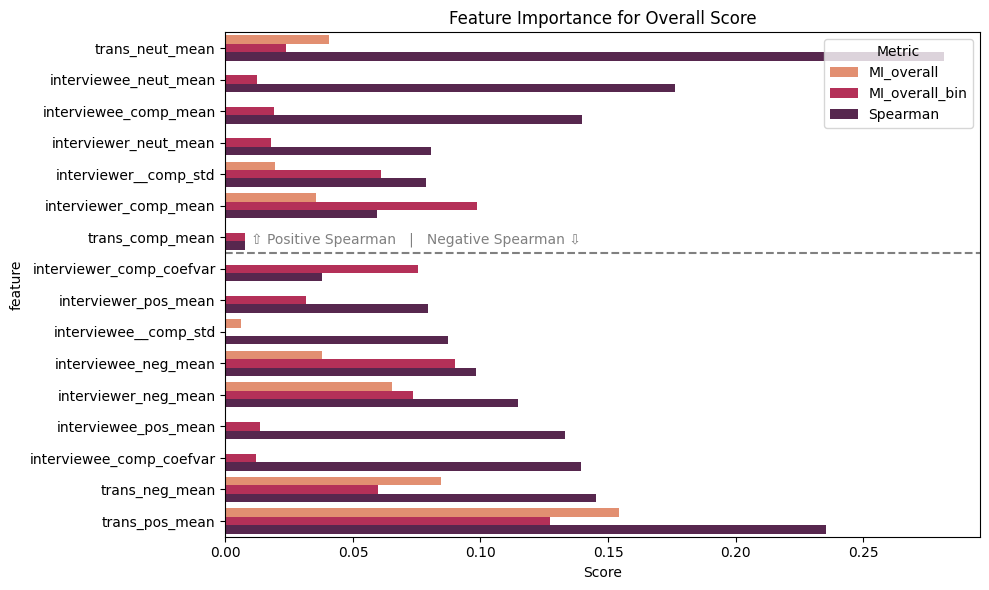

In [ ]:

df_mi = df_overall[['feature', 'MI_overall', 'MI_overall_bin']].melt(id_vars='feature', var_name='Metric', value_name='Score')

# q spearman to melted version for combined plotting
df_spearman = df_overall[['feature', 'spearman_overall']].copy()
df_spearman['Metric'] = 'Spearman'
df_spearman['Score'] = df_spearman['spearman_overall'].abs()

df_plot = pd.concat([df_mi, df_spearman[['feature', 'Metric', 'Score']]], ignore_index=True)
feature_order = df_overall['feature'].tolist()

# determine index where Spearman switches sign
sep_index = df_overall[df_overall['spearman_overall'] < 0].index.min()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Score', y='feature', hue='Metric', order=feature_order,palette='rocket_r')

plt.axhline(sep_index - 0.5, color='gray', linestyle='--')
plt.text(0.01, sep_index - 0.8, '⇧ Positive Spearman   |   Negative Spearman ⇩', color='gray')

plt.title('Feature Importance for Overall Score')
plt.tight_layout()
plt.show()


In [ ]:
df_excite

feature  spearman_excitement  MI_excitement  \
0            trans_comp_mean             0.241051       0.107451   
1      interviewee_comp_mean             0.159792       0.000000   
2      interviewer_neut_mean             0.107834       0.027580   
3             trans_pos_mean             0.025442       0.145111   
4       interviewee_pos_mean             0.020023       0.000000   
5      interviewee_neut_mean             0.012715       0.000000   
6      interviewer_comp_mean             0.011151       0.043592   
7            trans_neut_mean             0.003249       0.061486   
8   interviewer_comp_coefvar            -0.031241       0.044322   
9       interviewee_neg_mean            -0.056586       0.010585   
10            trans_neg_mean            -0.066764       0.018446   
11     interviewee__comp_std            -0.077077       0.075813   
12     interviewer__comp_std            -0.079406       0.047184   
13      interviewer_pos_mean            -0.099208       0.000000   
14      interviewer_neg_mean            -0.147557       0.036006   
15  interviewee_comp_coefvar            -0.159475       0.055149   

    MI_excitement_bin  
0            0.000138  
1            0.006267  
2            0.000000  
3            0.078765  
4            0.000000  
5            0.000000  
6            0.000000  
7            0.015756  
8            0.024951  
9            0.101568  
10           0.000000  
11           0.032037  
12           0.098038  
13           0.010668  
14           0.024302  
15           0.037848

# New Section

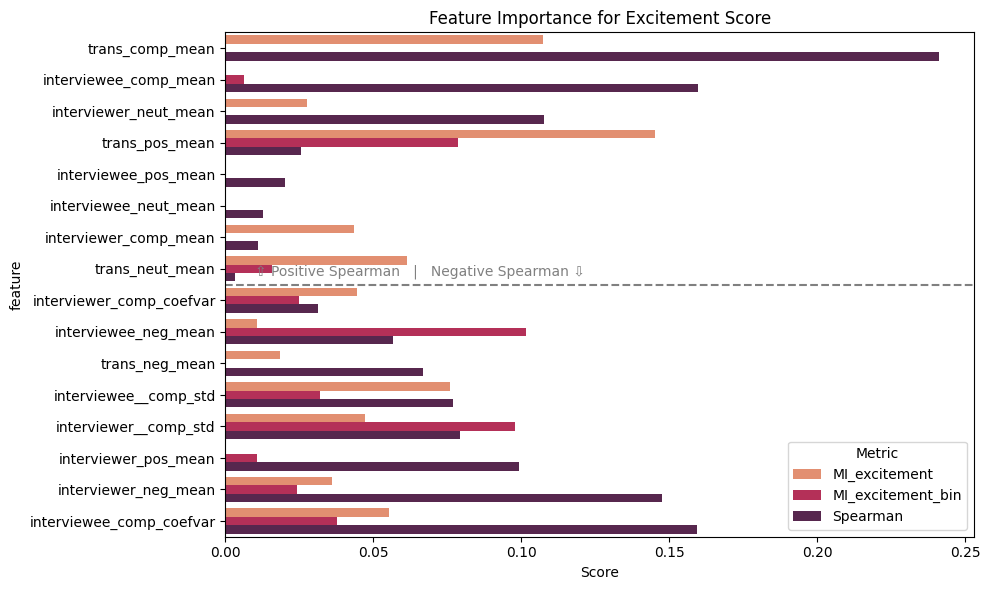

In [ ]:

df_mi = df_excite[['feature', 'MI_excitement', 'MI_excitement_bin']].melt(id_vars='feature', var_name='Metric', value_name='Score')

# q spearman to melted version for combined plotting
df_spearman = df_excite[['feature', 'spearman_excitement']].copy()
df_spearman['Metric'] = 'Spearman'
df_spearman['Score'] = df_spearman['spearman_excitement'].abs()

df_plot = pd.concat([df_mi, df_spearman[['feature', 'Metric', 'Score']]], ignore_index=True)
feature_order = df_excite['feature'].tolist()

# determine index where Spearman switches sign
sep_index = df_excite[df_excite['spearman_excitement'] < 0].index.min()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Score', y='feature', hue='Metric', order=feature_order,palette='rocket_r')

plt.axhline(sep_index - 0.5, color='gray', linestyle='--')
plt.text(0.01, sep_index - 0.8, '⇧ Positive Spearman   |   Negative Spearman ⇩', color='gray')

plt.title('Feature Importance for Excitement Score')
plt.tight_layout()
plt.show()


# Part C


In [ ]:

top_features_overall = top_overall['feature'].tolist()
top_features_overall



['trans_neut_mean',
 'trans_pos_mean',
 'interviewee_neut_mean',
 'trans_neg_mean',
 'interviewee_comp_mean']

In [ ]:
top_features_excite = top_excite['feature'].tolist()
top_features_excite

['trans_comp_mean',
 'interviewee_comp_mean',
 'interviewee_comp_coefvar',
 'interviewer_neg_mean',
 'interviewer_neut_mean']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from tensorflow import keras


def evaluate_predictions(y_true, y_pred):
    if np.std(y_true) == 0 or np.std(y_pred) == 0:
        pearson_r = 0
    else:
        pearson_r, _ = pearsonr(y_true, y_pred)
    relative_error = np.mean(np.abs((y_true - y_pred) / y_true))
    return pearson_r, relative_error

def train_xgboost(X_train, X_test, y_train, y_test):
    model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pearson_r, rel_error = evaluate_predictions(y_test, y_pred)
    return model, pearson_r, rel_error

def train_deep_learning(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
    y_pred = model.predict(X_test_scaled).flatten()
    pearson_r, rel_error = evaluate_predictions(y_test, y_pred)
    return model, pearson_r, rel_error

def get_top_k_spearman_features(df, feature_cols, target_col, k, absolute=True):
    spearman_corr = df[feature_cols + [target_col]].corr(method='spearman')
    target_corr = spearman_corr[target_col].drop(index=target_col)

    if absolute:
        top_k = target_corr.abs().sort_values(ascending=False).head(k)
    else:
        top_k = target_corr.sort_values(ascending=False).head(k)

    return pd.DataFrame({
        'feature': top_k.index,
        'spearman_corr': target_corr[top_k.index]
    }).reset_index(drop=True)

def train_models_across_k(df, feature_list, max_k=20):
    results = {'k': [],
               'XGB_Overall_r': [], 'XGB_Overall_re': [],
               'XGB_Excite_r': [], 'XGB_Excite_re': [],
               'DL_Overall_r': [], 'DL_Overall_re': [],
               'DL_Excite_r': [], 'DL_Excite_re': [],
               'Overall_Baseline_r': [], 'Overall_Baseline_re': [],
               'Excite_Baseline_r': [], 'Excite_Baseline_re': []}

    for k in range(1, max_k + 1):
        top_k_overall = get_top_k_spearman_features(df, feature_list, 'overall_score', k, True)['feature'].tolist()
        top_k_excite = get_top_k_spearman_features(df, feature_list, 'excitement_score', k, True)['feature'].tolist()

        # Overall
        X = df[top_k_overall]
        y = df['overall_score']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

        overall_baseline_pred = np.full_like(y_test, np.mean(y_train))
        overall_baseline_r, overall_baseline_re = evaluate_predictions(y_test, overall_baseline_pred)

        _, r_xgb_overall, re_xgb_overall = train_xgboost(X_train, X_test, y_train, y_test)
        _, r_dl_overall, re_dl_overall = train_deep_learning(X_train, X_test, y_train, y_test)

        # Excite
        X = df[top_k_excite]
        y = df['excitement_score']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

        excite_baseline_pred = np.full_like(y_test, np.mean(y_train))
        excite_baseline_r, excite_baseline_re = evaluate_predictions(y_test, excite_baseline_pred)

        _, r_xgb_excite, re_xgb_excite = train_xgboost(X_train, X_test, y_train, y_test)
        _, r_dl_excite, re_dl_excite = train_deep_learning(X_train, X_test, y_train, y_test)

        # Save
        results['k'].append(k)
        results['XGB_Overall_r'].append(r_xgb_overall)
        results['XGB_Overall_re'].append(re_xgb_overall)
        results['XGB_Excite_r'].append(r_xgb_excite)
        results['XGB_Excite_re'].append(re_xgb_excite)
        results['DL_Overall_r'].append(r_dl_overall)
        results['DL_Overall_re'].append(re_dl_overall)
        results['DL_Excite_r'].append(r_dl_excite)
        results['DL_Excite_re'].append(re_dl_excite)
        results['Overall_Baseline_r'].append(overall_baseline_r)
        results['Overall_Baseline_re'].append(overall_baseline_re)
        results['Excite_Baseline_r'].append(excite_baseline_r)
        results['Excite_Baseline_re'].append(excite_baseline_re)

    return pd.DataFrame(results)

def plot_results(results_df):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(results_df['k'], results_df['XGB_Overall_r'], label='XGB Overall')
    plt.plot(results_df['k'], results_df['DL_Overall_r'], label='FNN Overall')
    plt.plot(results_df['k'], results_df['XGB_Excite_r'], label='XGB Excite')
    plt.plot(results_df['k'], results_df['DL_Excite_r'], label='FNN Excite')
    plt.hlines(results_df['Overall_Baseline_r'].iloc[0], xmin=1, xmax=results_df['k'].max(), colors='black', linestyles='dotted', label='Overall Baseline')
    plt.hlines(results_df['Excite_Baseline_r'].iloc[0], xmin=1, xmax=results_df['k'].max(), colors='gray', linestyles='dotted', label='Excite Baseline')
    plt.xlabel('Top-k Features')
    plt.ylabel('Pearson r')
    plt.title('Pearson r vs k')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(results_df['k'], results_df['XGB_Overall_re'], label='XGB Overall')
    plt.plot(results_df['k'], results_df['DL_Overall_re'], label='FNN Overall')
    plt.plot(results_df['k'], results_df['XGB_Excite_re'], label='XGB Excite')
    plt.plot(results_df['k'], results_df['DL_Excite_re'], label='FNN Excite')
    plt.hlines(results_df['Overall_Baseline_re'].iloc[0], xmin=1, xmax=results_df['k'].max(), colors='black', linestyles='dotted', label='Overall Baseline')
    plt.hlines(results_df['Excite_Baseline_re'].iloc[0], xmin=1, xmax=results_df['k'].max(), colors='gray', linestyles='dotted', label='Excite Baseline')
    plt.xlabel('Top-k Features')
    plt.ylabel('Absolute Relative Error')
    plt.title('Relative Error vs k')
    plt.legend()

    plt.tight_layout()
    plt.show()




In [ ]:
semantic_list = [
    'interviewee_pos_mean',	'interviewee_neg_mean',	'interviewee_neut_mean',	'interviewee_comp_mean',	'interviewee__comp_std',	'interviewee_comp_coefvar',
    'interviewer_pos_mean',	'interviewer_neg_mean',	'interviewer_neut_mean',	'interviewer_comp_mean',	'interviewer__comp_std',	'interviewer_comp_coefvar',
    'trans_pos_mean',	'trans_neg_mean',	'trans_neut_mean',	'trans_comp_mean'
]

<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 55ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 110ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 56ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 71ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 59ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 54ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 54ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 54ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 80ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 56ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 56ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 58ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 56ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 70ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 89ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 59ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 54ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 76ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 58ms/step


<ipython-input-44-e0594ed973c7>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 55ms/step


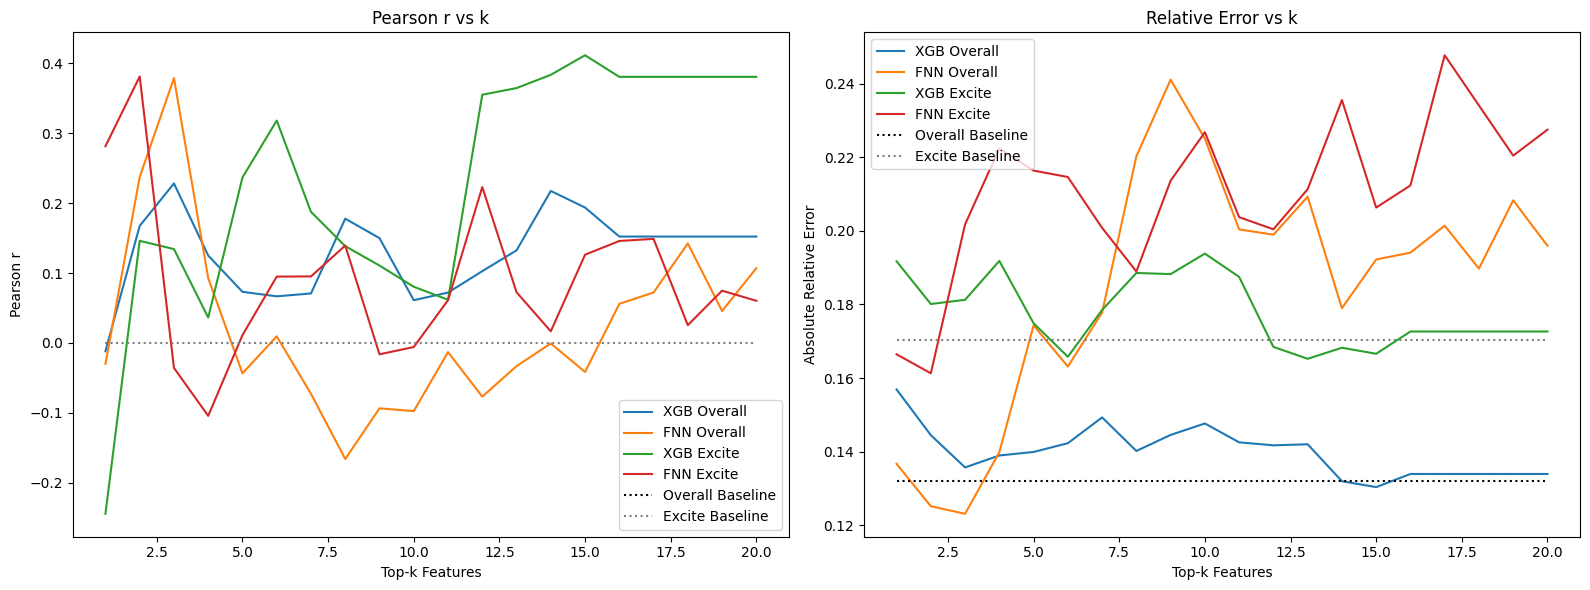

In [ ]:

results = train_models_across_k(df_full_part_features, semantic_list, max_k=20)
plot_results(results)

# PART D


In [ ]:


def determine_interview(id_str):
    if id_str.startswith('pp'):
        return 'interview_2'
    elif id_str.startswith('p'):
        return 'interview_1'
    else:
        return 'unknown'

# prosodic_df['interview'] = prosodic_df['participant&question'].apply(determine_interview)


In [ ]:

def clean_id(id_str):
    id_str = id_str.lower()
    if id_str.startswith('pp'):
        id_str = 'p' + id_str[2:]
    return id_str.lower()


# prosodic_df['id_cleaned'] = prosodic_df['participant&question'].apply(clean_id)


In [ ]:
prosodic_df = pd.read_csv(path_prosodic)
prosodic_df.head()

participant&question   duration    energy  min_pitch   max_pitch  \
0                 P1Q1  51.952125  0.015331  75.232657  396.635613   
1                 P1Q2  38.677312  0.015185  75.165527  397.613041   
2                 P1Q3  43.593896  0.014680  71.034761  395.930688   
3                 P1Q4  23.435813  0.008920  74.938673  248.733738   
4                 P1Q5  13.274833  0.003432  93.949854  263.669188   

   mean_pitch   pitch_sd   pitch_abs  pitch_quant  pitchUvsVRatio  ...  \
0  127.989222  27.821528  217.628692   119.690367        0.773830  ...   
1  131.067490  26.452853  195.852246   124.820583        0.717333  ...   
2  127.739086  26.006330  189.441737   120.457848        1.068376  ...   
3  129.563914  19.334327  103.024640   124.473851        1.121487  ...   
4  130.178482  26.595483  174.934601   120.272480        1.078493  ...   

   numVoiceBreaks  PercentBreaks  speakRate  numPause  maxDurPause  \
0             136        0.42117   0.000342        55     1.290667   
1              97        0.38674   0.000444        40     1.866667   
2             112        0.43099   0.000475        44     2.624000   
3              55        0.46003   0.000907        24     2.933333   
4              32        0.46576   0.001570        12     2.848000   

   avgDurPause  TotDurPause:3  iInterval  MaxRising:3  MaxFalling:3  
0        0.494         27.176        138      274.562       257.247  
1        0.522         20.875        100      268.613       270.193  
2        0.505         22.229        114      283.912       203.506  
3        0.507         12.171         55      100.655        83.172  
4        0.628          7.541         32      129.591       117.119  

[5 rows x 36 columns]

In [ ]:
import pandas as pd

prosodic_df['participant&question'] = prosodic_df['participant&question'].str.lower()

prosodic_df['participant_id'] = prosodic_df['participant&question'].apply(lambda x: x.split('q')[0])

numeric_cols = prosodic_df.select_dtypes(include='number').columns.tolist()
columns_to_keep = ['participant_id'] + numeric_cols

df_numeric = prosodic_df[columns_to_keep]

grouped_df = df_numeric.groupby('participant_id').mean().reset_index()

grouped_df = grouped_df.rename(columns={'participant_id': 'id'})

grouped_df


id   duration    energy  min_pitch   max_pitch  mean_pitch   pitch_sd  \
0      p1  34.186796  0.011510  78.064294  340.516454  129.307639  25.242104   
1     p10  77.378613  0.032118  74.787772  345.935347  112.955696  25.915806   
2     p11  50.431333  0.007220  73.605587  384.004524  186.524402  35.911648   
3     p12  35.910442  0.008005  73.706414  326.346399  181.006693  40.494458   
4     p13  51.049858  0.001618  75.141598  332.370097  181.156105  41.081781   
..    ...        ...       ...        ...         ...         ...        ...   
133  pp83  28.907788  0.003143  75.106137  375.449500  240.799891  47.024393   
134  pp84  52.262092  0.008353  77.471544  393.760530  209.208918  28.918232   
135  pp85  62.115933  0.007095  71.071074  367.137037  108.901779  33.320900   
136  pp86  76.643092  0.010589  78.332326  353.811432  128.650234  33.885335   
137  pp89  80.570025  0.019874  72.692857  367.095029  141.030662  26.478476   

      pitch_abs  pitch_quant  pitchUvsVRatio  ...  numVoiceBreaks  \
0    176.176383   121.943026        0.951904  ...            86.4   
1    166.265804   106.681483        0.825242  ...           149.4   
2    226.353579   183.792011        0.628611  ...           120.8   
3    266.110211   184.081501        0.804380  ...            92.2   
4    249.154938   189.416587        1.112407  ...           113.8   
..          ...          ...             ...  ...             ...   
133  306.047489   238.655133        0.634296  ...            56.0   
134  255.670407   206.123903        0.502713  ...           109.0   
135  194.309486    98.183810        0.894414  ...           199.4   
136  175.557862   117.174766        1.211922  ...           149.8   
137  152.971090   133.204547        0.682581  ...           158.8   

     PercentBreaks  speakRate  numPause  maxDurPause  avgDurPause  \
0         0.432938   0.000747      35.0     2.312533       0.5312   
1         0.411714   0.000294      58.0     2.502400       0.7232   
2         0.367116   0.000360      47.4     2.998190       0.5326   
3         0.397498   0.000573      24.0     4.592919       0.9796   
4         0.491840   0.000487      37.0     2.650825       0.6952   
..             ...        ...       ...          ...          ...   
133       0.353642   0.000600      23.6     1.668267       0.5334   
134       0.318550   0.000328      43.8     2.421333       0.6678   
135       0.476654   0.000321      65.0     1.902269       0.4726   
136       0.532018   0.000436      56.4     3.593904       0.8752   
137       0.396230   0.000232      51.0     5.111467       1.0658   

     TotDurPause:3  iInterval  MaxRising:3  MaxFalling:3  
0          17.9984       87.8     211.4666      186.2474  
1          39.8548      159.8     231.7972      222.0450  
2          25.7530      127.8     176.2874      203.0714  
3          24.3694       94.8     152.8112      148.5378  
4          25.0772      118.6     186.6008      166.8634  
..             ...        ...          ...           ...  
133        12.0980       62.0     181.8062      196.4858  
134        29.9078      115.2     161.6076      199.9002  
135        30.9808      207.4     262.1438      260.6900  
136        48.0354      151.8     197.7248      198.5142  
137        52.1686      165.2     189.6130      217.8448  

[138 rows x 35 columns]

In [ ]:

grouped_df['interview'] = grouped_df['id'].apply(determine_interview)


In [ ]:
grouped_df['plain_id'] = grouped_df['id'].apply(clean_id)

In [ ]:
# grouped_df = grouped_df.drop(columns='id_cleaned')
grouped_df = grouped_df.rename(columns={'plain_id': 'participant'})

In [ ]:
all_features_df = pd.merge(df_full_part_features, grouped_df, on=['participant', 'interview'], how='inner')


In [ ]:
all_features_df

participant    interview  overall_score  excitement_score  \
0            p1  interview_1       5.297316          5.043890   
1            p1  interview_2       4.951525          4.223099   
2           p10  interview_1       4.725115          4.383947   
3           p10  interview_2       4.439333          4.866627   
4           p11  interview_1       5.010430          4.297760   
..          ...          ...            ...               ...   
133         p85  interview_2       5.626074          5.584830   
134         p86  interview_1       4.474839          5.245841   
135         p86  interview_2       4.853881          5.137644   
136         p89  interview_1       4.737143          3.853414   
137         p89  interview_2       4.960084          4.407999   

     interviewee_pos_mean  interviewee_neg_mean  interviewee_neut_mean  \
0                0.222250              0.013625               0.764000   
1                0.285500              0.016167               0.698167   
2                0.160882              0.011824               0.827176   
3                0.255500              0.007167               0.737333   
4                0.080500              0.013667               0.906000   
..                    ...                   ...                    ...   
133              0.301000              0.009375               0.689625   
134              0.442857              0.006857               0.550357   
135              0.295462              0.016538               0.688000   
136              0.236000              0.012286               0.751714   
137              0.262600              0.037100               0.700500   

     interviewee_comp_mean  interviewee__comp_std  interviewee_comp_coefvar  \
0                 0.717063               0.213917                  0.298324   
1                 0.678150               0.246326                  0.363232   
2                 0.377135               0.492714                  1.306466   
3                 0.768567               0.197039                  0.256372   
4                 0.525633               0.423524                  0.805741   
..                     ...                    ...                       ...   
133               0.756587               0.377446                  0.498879   
134               0.567614               0.378721                  0.667215   
135               0.512454               0.456035                  0.889905   
136               0.726057               0.405024                  0.557840   
137               0.534380               0.506002                  0.946896   

     ...  numVoiceBreaks  PercentBreaks  speakRate  numPause  maxDurPause  \
0    ...            86.4       0.432938   0.000747      35.0     2.312533   
1    ...            59.8       0.467564   0.001033      26.8     2.361013   
2    ...           149.4       0.411714   0.000294      58.0     2.502400   
3    ...            70.8       0.366604   0.000512      31.4     3.490133   
4    ...           120.8       0.367116   0.000360      47.4     2.998190   
..   ...             ...            ...        ...       ...          ...   
133  ...           199.4       0.476654   0.000321      65.0     1.902269   
134  ...           159.6       0.500596   0.000305      52.2     4.219733   
135  ...           149.8       0.532018   0.000436      56.4     3.593904   
136  ...           101.6       0.419288   0.000313      43.4     3.925333   
137  ...           158.8       0.396230   0.000232      51.0     5.111467   

     avgDurPause  TotDurPause:3  iInterval  MaxRising:3  MaxFalling:3  
0         0.5312        17.9984       87.8     211.4666      186.2474  
1         0.5616        14.9534       60.8     166.5614      171.2368  
2         0.7232        39.8548      159.8     231.7972      222.0450  
3         0.7336        22.3272       72.6     159.0006      185.8908  
4         0.5326        25.7530      127.8     176.2874      203.0714  
..           ...            

In [ ]:
for idx, col in enumerate(all_features_df.columns):
    print(f"{idx}: {col}")

0: participant
1: interview
2: overall_score
3: excitement_score
4: interviewee_pos_mean
5: interviewee_neg_mean
6: interviewee_neut_mean
7: interviewee_comp_mean
8: interviewee__comp_std
9: interviewee_comp_coefvar
10: interviewer_pos_mean
11: interviewer_neg_mean
12: interviewer_neut_mean
13: interviewer_comp_mean
14: interviewer__comp_std
15: interviewer_comp_coefvar
16: trans_pos_mean
17: trans_neg_mean
18: trans_neut_mean
19: trans_comp_mean
20: id
21: duration
22: energy
23: min_pitch
24: max_pitch
25: mean_pitch
26: pitch_sd
27: pitch_abs
28: pitch_quant
29: pitchUvsVRatio
30: diffPitchMaxMin
31: diffPitchMaxMean
32: diffPitchMaxMode
33: intensityMin
34: intensityMax
35: intensityMean
36: intensitySD
37: intensityQuant
38: diffIntMaxMin
39: diffIntMaxMean
40: diffIntMaxMode
41: avgVal1
42: avgBand2
43: jitter
44: shimmer
45: numVoiceBreaks
46: PercentBreaks
47: speakRate
48: numPause
49: maxDurPause
50: avgDurPause
51: TotDurPause:3
52: iInterval
53: MaxRising:3
54: MaxFalling:3

In [ ]:
prosody_features = all_features_df.columns[21:].tolist()
prosody_features

['duration',
 'energy',
 'min_pitch',
 'max_pitch',
 'mean_pitch',
 'pitch_sd',
 'pitch_abs',
 'pitch_quant',
 'pitchUvsVRatio',
 'diffPitchMaxMin',
 'diffPitchMaxMean',
 'diffPitchMaxMode',
 'intensityMin',
 'intensityMax',
 'intensityMean',
 'intensitySD',
 'intensityQuant',
 'diffIntMaxMin',
 'diffIntMaxMean',
 'diffIntMaxMode',
 'avgVal1',
 'avgBand2',
 'jitter',
 'shimmer',
 'numVoiceBreaks',
 'PercentBreaks',
 'speakRate',
 'numPause',
 'maxDurPause',
 'avgDurPause',
 'TotDurPause:3',
 'iInterval',
 'MaxRising:3',
 'MaxFalling:3']

In [ ]:

def evaluate_predictions(y_true, y_pred):
    if np.std(y_true) == 0 or np.std(y_pred) == 0:
        pearson_r = 0
    else:
        pearson_r, _ = pearsonr(y_true, y_pred)
    relative_error = np.mean(np.abs((y_true - y_pred) / y_true))
    return pearson_r, relative_error

def train_xgboost(X_train, X_test, y_train, y_test):
    model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pearson_r, rel_error = evaluate_predictions(y_test, y_pred)
    return model, pearson_r, rel_error

def train_deep_learning(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
    y_pred = model.predict(X_test_scaled).flatten()
    pearson_r, rel_error = evaluate_predictions(y_test, y_pred)
    return model, pearson_r, rel_error

def get_top_k_spearman_features(df, feature_cols, target_col, k, absolute=True):
    spearman_corr = df[feature_cols + [target_col]].corr(method='spearman')
    target_corr = spearman_corr[target_col].drop(index=target_col)

    if absolute:
        top_k = target_corr.abs().sort_values(ascending=False).head(k)
    else:
        top_k = target_corr.sort_values(ascending=False).head(k)

    return pd.DataFrame({
        'feature': top_k.index,
        'spearman_corr': target_corr[top_k.index]
    }).reset_index(drop=True)

def train_models_across_k(df, feature_list, max_k):
    results = {'k': [],
               'XGB_Overall_r': [], 'XGB_Overall_re': [],
               'XGB_Excite_r': [], 'XGB_Excite_re': [],
               'DL_Overall_r': [], 'DL_Overall_re': [],
               'DL_Excite_r': [], 'DL_Excite_re': [],
               'Overall_Baseline_r': [], 'Overall_Baseline_re': [],
               'Excite_Baseline_r': [], 'Excite_Baseline_re': []}

    for k in range(1, max_k + 1):
        top_k_overall = get_top_k_spearman_features(df, feature_list, 'overall_score', k, True)['feature'].tolist()
        top_k_excite = get_top_k_spearman_features(df, feature_list, 'excitement_score', k, True)['feature'].tolist()

        # Overall
        X = df[top_k_overall]
        y = df['overall_score']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

        overall_baseline_pred = np.full_like(y_test, np.mean(y_train))
        overall_baseline_r, overall_baseline_re = evaluate_predictions(y_test, overall_baseline_pred)

        _, r_xgb_overall, re_xgb_overall = train_xgboost(X_train, X_test, y_train, y_test)
        _, r_dl_overall, re_dl_overall = train_deep_learning(X_train, X_test, y_train, y_test)

        # Excite
        X = df[top_k_excite]
        y = df['excitement_score']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

        excite_baseline_pred = np.full_like(y_test, np.mean(y_train))
        excite_baseline_r, excite_baseline_re = evaluate_predictions(y_test, excite_baseline_pred)

        _, r_xgb_excite, re_xgb_excite = train_xgboost(X_train, X_test, y_train, y_test)
        _, r_dl_excite, re_dl_excite = train_deep_learning(X_train, X_test, y_train, y_test)

        # Save
        results['k'].append(k)
        results['XGB_Overall_r'].append(r_xgb_overall)
        results['XGB_Overall_re'].append(re_xgb_overall)
        results['XGB_Excite_r'].append(r_xgb_excite)
        results['XGB_Excite_re'].append(re_xgb_excite)
        results['DL_Overall_r'].append(r_dl_overall)
        results['DL_Overall_re'].append(re_dl_overall)
        results['DL_Excite_r'].append(r_dl_excite)
        results['DL_Excite_re'].append(re_dl_excite)
        results['Overall_Baseline_r'].append(overall_baseline_r)
        results['Overall_Baseline_re'].append(overall_baseline_re)
        results['Excite_Baseline_r'].append(excite_baseline_r)
        results['Excite_Baseline_re'].append(excite_baseline_re)

    return pd.DataFrame(results)

def plot_results(results_df):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(results_df['k'], results_df['XGB_Overall_r'], label='XGB Overall')
    plt.plot(results_df['k'], results_df['DL_Overall_r'], label='FNN Overall')
    plt.plot(results_df['k'], results_df['XGB_Excite_r'], label='XGB Excite')
    plt.plot(results_df['k'], results_df['DL_Excite_r'], label='FNN Excite')
    plt.hlines(results_df['Overall_Baseline_r'].iloc[0], xmin=1, xmax=results_df['k'].max(), colors='black', linestyles='dotted', label='Overall Baseline')
    plt.hlines(results_df['Excite_Baseline_r'].iloc[0], xmin=1, xmax=results_df['k'].max(), colors='gray', linestyles='dotted', label='Excite Baseline')
    plt.xlabel('Top-k Features')
    plt.ylabel('Pearson r')
    plt.title('Pearson r vs k')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(results_df['k'], results_df['XGB_Overall_re'], label='XGB Overall')
    plt.plot(results_df['k'], results_df['DL_Overall_re'], label='FNN Overall')
    plt.plot(results_df['k'], results_df['XGB_Excite_re'], label='XGB Excite')
    plt.plot(results_df['k'], results_df['DL_Excite_re'], label='FNN Excite')
    plt.hlines(results_df['Overall_Baseline_re'].iloc[0], xmin=1, xmax=results_df['k'].max(), colors='black', linestyles='dotted', label='Overall Baseline')
    plt.hlines(results_df['Excite_Baseline_re'].iloc[0], xmin=1, xmax=results_df['k'].max(), colors='gray', linestyles='dotted', label='Excite Baseline')
    plt.xlabel('Top-k Features')
    plt.ylabel('Absolute Relative Error')
    plt.title('Relative Error vs k')
    plt.legend()

    plt.tight_layout()
    plt.show()




<ipython-input-58-832ca687dfb0>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 75ms/step


<ipython-input-58-832ca687dfb0>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 59ms/step


<ipython-input-58-832ca687dfb0>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 57ms/step


<ipython-input-58-832ca687dfb0>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 78ms/step


<ipython-input-58-832ca687dfb0>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 56ms/step


<ipython-input-58-832ca687dfb0>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 55ms/step


<ipython-input-58-832ca687dfb0>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 62ms/step


<ipython-input-58-832ca687dfb0>:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(y_true, y_pred)


1/1 [==============================] - 0s 58ms/step


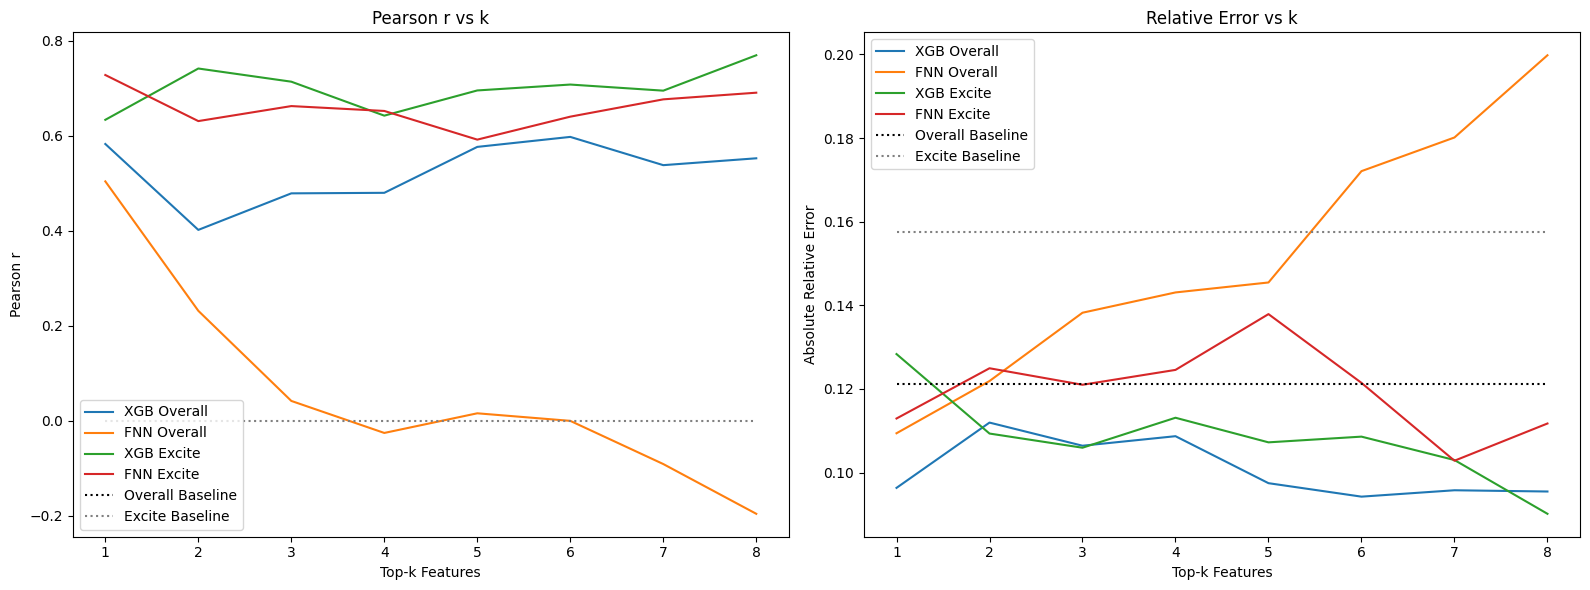

In [ ]:
results = train_models_across_k(all_features_df, prosody_features, max_k=8)
plot_results(results)

In [ ]:

from sklearn.model_selection import KFold
from scipy.stats import pearsonr, spearmanr

def evaluate_predictions(y_true, y_pred):
    if np.std(y_true) == 0 or np.std(y_pred) == 0:
        pearson_r = 0
    else:
        pearson_r, _ = pearsonr(y_true, y_pred)
    relative_error = np.mean(np.abs((y_true - y_pred) / y_true))
    return pearson_r, relative_error

def train_xgboost(X_train, X_test, y_train, y_test):
    model = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pearson_r, rel_error = evaluate_predictions(y_test, y_pred)
    return model, pearson_r, rel_error

def train_deep_learning(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=150, batch_size=16, verbose=0)
    y_pred = model.predict(X_test_scaled).flatten()
    pearson_r, rel_error = evaluate_predictions(y_test, y_pred)
    return model, pearson_r, rel_error

def cross_val_evaluate_model(model_fn, X, y, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    pearsons = []
    rel_errors = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        _, r, re = model_fn(X_train, X_test, y_train, y_test)
        pearsons.append(r)
        rel_errors.append(re)

    return np.mean(pearsons), np.mean(rel_errors)


def run_baseline_models(df, semantic_features, prosodic_features):
    results = {}
    for target in ['overall_score', 'excitement_score']:
        y = df[target]
        mean_prediction = [y.mean()] * len(y)
        pearson_r, rel_error = evaluate_predictions(y, mean_prediction)
        results[f'{target}_baseline'] = (pearson_r, rel_error)
    return results

def get_feature_importance_xgb(X, y):
    model = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05, random_state=42)
    model.fit(X, y)
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    return importance_df


def select_top_features(df, features, target, top_n):
    correlations = [(f, abs(spearmanr(df[f], df[target])[0])) for f in features]
    top_features = sorted(correlations, key=lambda x: x[1], reverse=True)[:top_n]
    return [f[0] for f in top_features]

def plot_multimodal_results_per_target(all_results, all_baselines):
    for target in ['overall_score', 'excitement_score']:
        results = {k: v for k, v in all_results.items() if target in k}

        labels = [
            f'Semantic XGB',
            f'Semantic FNN',
            f'Prosodic XGB',
            f'Prosodic FNN',
            f'Combined XGB',
            f'Combined FNN',
        ]
        keys = [
            f'{target}_semantic_xgb',
            f'{target}_semantic_dl',
            f'{target}_prosodic_xgb',
            f'{target}_prosodic_dl',
            f'{target}_combined_xgb',
            f'{target}_combined_dl',
        ]

        pearsons = [all_results[k][0] for k in keys]
        rel_errors = [all_results[k][1] for k in keys]

        fig, ax1 = plt.subplots(figsize=(10, 6))

        ax1.bar(labels, pearsons, color='skyblue')
        ax1.set_ylabel('Pearson r', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.set_ylim(0, 1)

        if f'{target}_baseline' in all_baselines:
            ax1.axhline(all_baselines[f'{target}_baseline'][0], color='blue', linestyle='--', label='Baseline r')

        ax2 = ax1.twinx()
        ax2.plot(labels, rel_errors, color='red', marker='o', label='Relative Error')
        ax2.set_ylabel('Absolute Relative Error', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        if f'{target}_baseline' in all_baselines:
            ax2.axhline(all_baselines[f'{target}_baseline'][1], color='red', linestyle='--', label='Baseline Error')

        fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2)
        plt.title(f"{target.capitalize()} Model Comparison with Baselines")
        fig.tight_layout()
        plt.show()

def evaluate_all_models(df, semantic_features, prosodic_features):
    results = {}
    for target in ['overall_score', 'excitement_score']:
        top_semantic = select_top_features(df, semantic_features, target, 15)
        top_prosodic = select_top_features(df, prosodic_features, target, 8)
        combined = top_semantic + top_prosodic
        y = df[target]

        results[f'{target}_semantic_xgb'] = cross_val_evaluate_model(train_xgboost, df[top_semantic], y)
        results[f'{target}_semantic_dl'] = cross_val_evaluate_model(train_deep_learning, df[top_semantic], y)
        results[f'{target}_prosodic_xgb'] = cross_val_evaluate_model(train_xgboost, df[top_prosodic], y)
        results[f'{target}_prosodic_dl'] = cross_val_evaluate_model(train_deep_learning, df[top_prosodic], y)
        results[f'{target}_combined_xgb'] = cross_val_evaluate_model(train_xgboost, df[combined], y)
        results[f'{target}_combined_dl'] = cross_val_evaluate_model(train_deep_learning, df[combined], y)
    return results


Baseline Results:
{'overall_score_baseline': (0, np.float64(0.10423224955626369)), 'excitement_score_baseline': (0, np.float64(0.14678129523607839))}
2/2 [==============================] - 0s 8ms/step


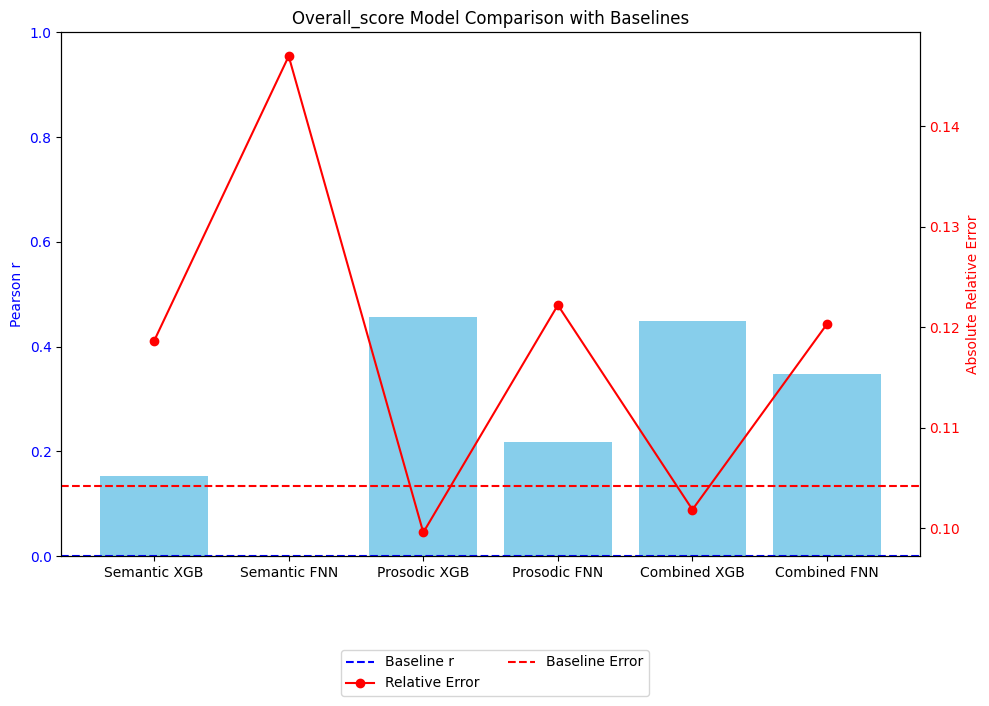

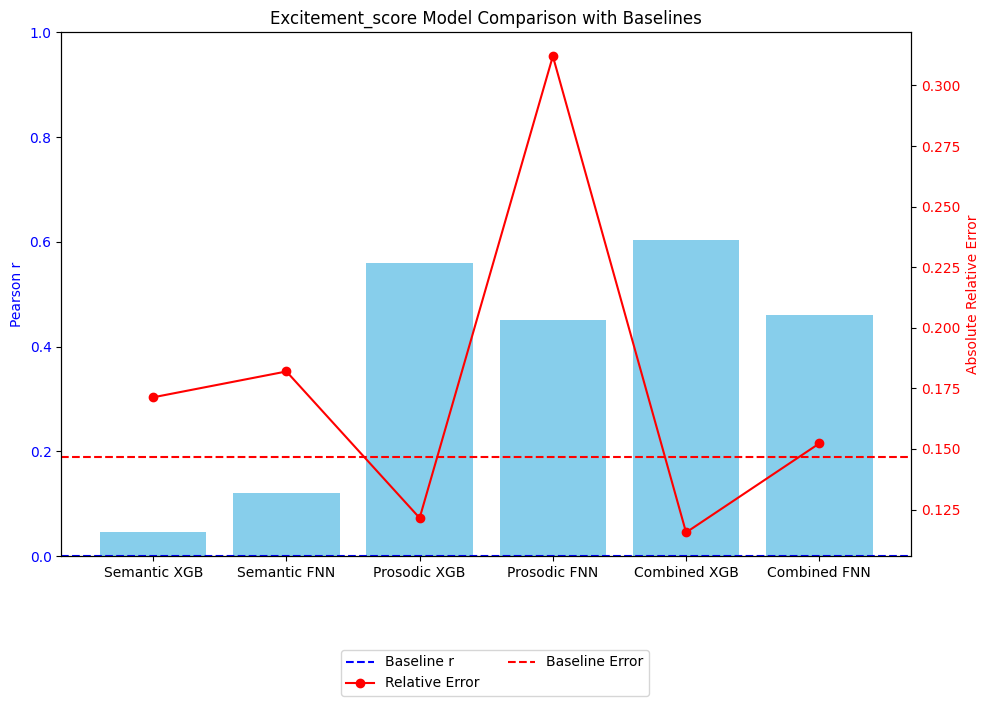


Top Features for 'overall':
             feature  importance
32    intensityQuant    0.231877
35    diffIntMaxMode    0.113971
27  diffPitchMaxMode    0.079114
12    trans_pos_mean    0.054319
24    pitchUvsVRatio    0.053505
29      intensityMax    0.046805
14   trans_neut_mean    0.040417
22         pitch_abs    0.033939
44       maxDurPause    0.027644
38            jitter    0.025369

Top Features for 'excitement':
           feature  importance
32  intensityQuant    0.427745
30   intensityMean    0.118410
20      mean_pitch    0.073724
42       speakRate    0.037671
22       pitch_abs    0.030086
24  pitchUvsVRatio    0.026272
31     intensitySD    0.024032
33   diffIntMaxMin    0.021763
37        avgBand2    0.019383
12  trans_pos_mean    0.016217


In [ ]:

baseline_results = run_baseline_models(all_features_df, semantic_list, prosody_features)
print("Baseline Results:")
print(baseline_results)

model_results = evaluate_all_models(all_features_df, semantic_list, prosody_features)

plot_multimodal_results_per_target(model_results, baseline_results)

combined_features = semantic_list + prosody_features
importance_overall = get_feature_importance_xgb(all_features_df[combined_features], all_features_df["overall_score"])
importance_excitement = get_feature_importance_xgb(all_features_df[combined_features], all_features_df["excitement_score"])

print("\nTop Features for 'overall':")
print(importance_overall.head(10))

print("\nTop Features for 'excitement':")
print(importance_excitement.head(10))


# PART E



### Model Explainability for OVERALL_SCORE ###
5/5 [==============================] - 0s 3ms/step

--- SHAP Explanation for XGBoost (overall_score) ---


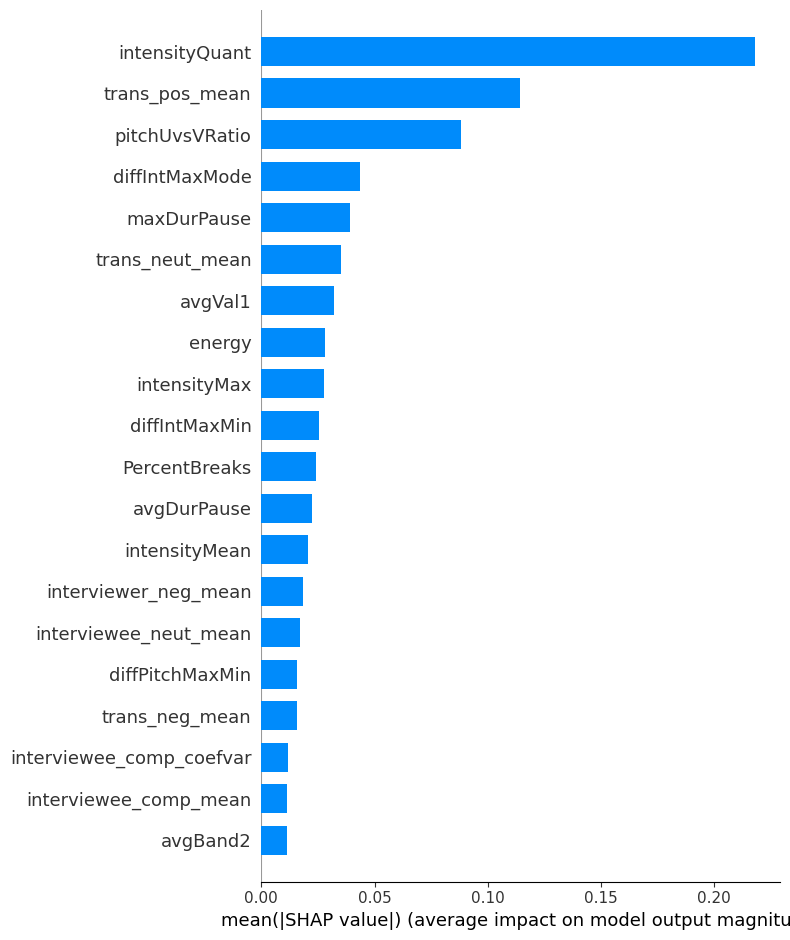

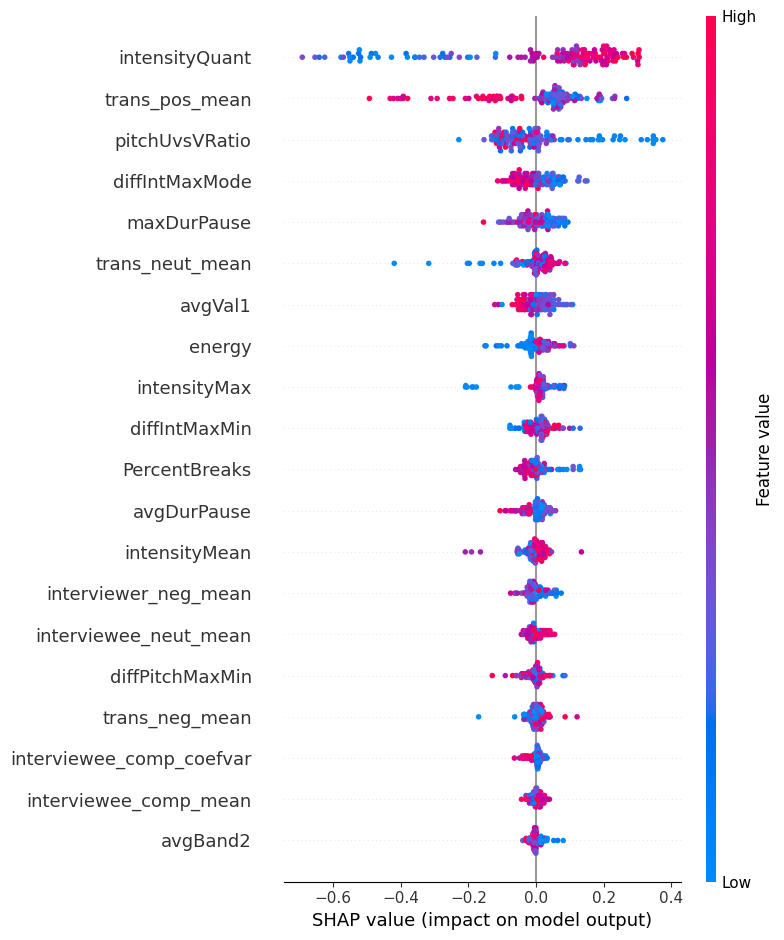


--- LIME Explanation for Deep Learning Model (overall_score) ---
157/157 [==============================] - 0s 2ms/step



### Model Explainability for EXCITEMENT_SCORE ###
5/5 [==============================] - 0s 3ms/step

--- SHAP Explanation for XGBoost (excitement_score) ---


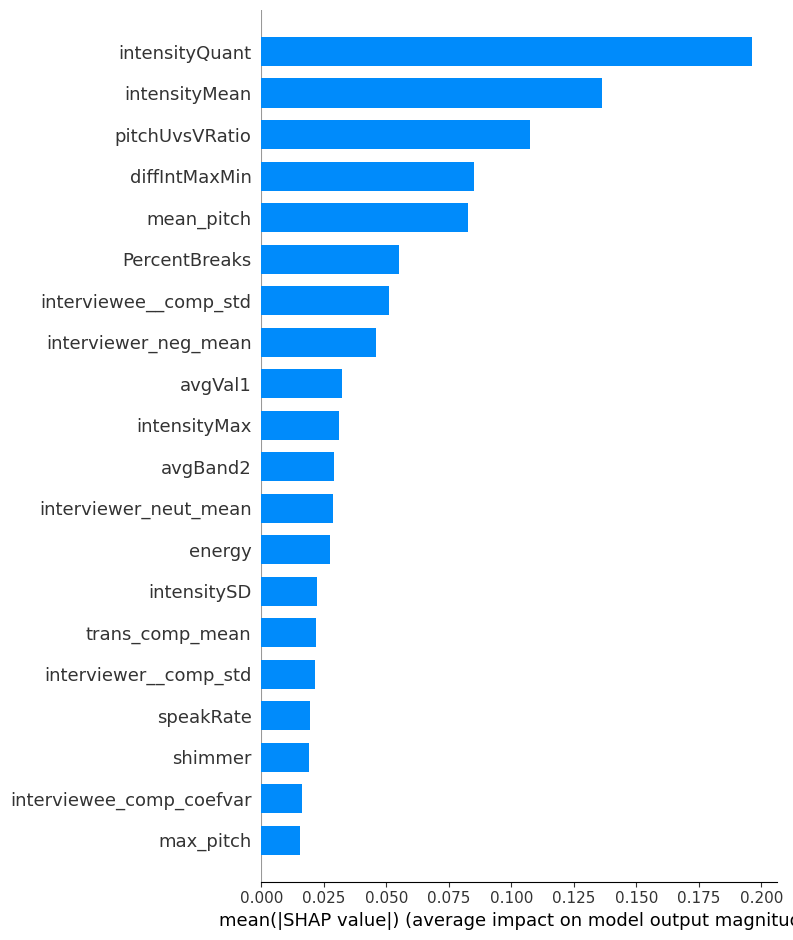

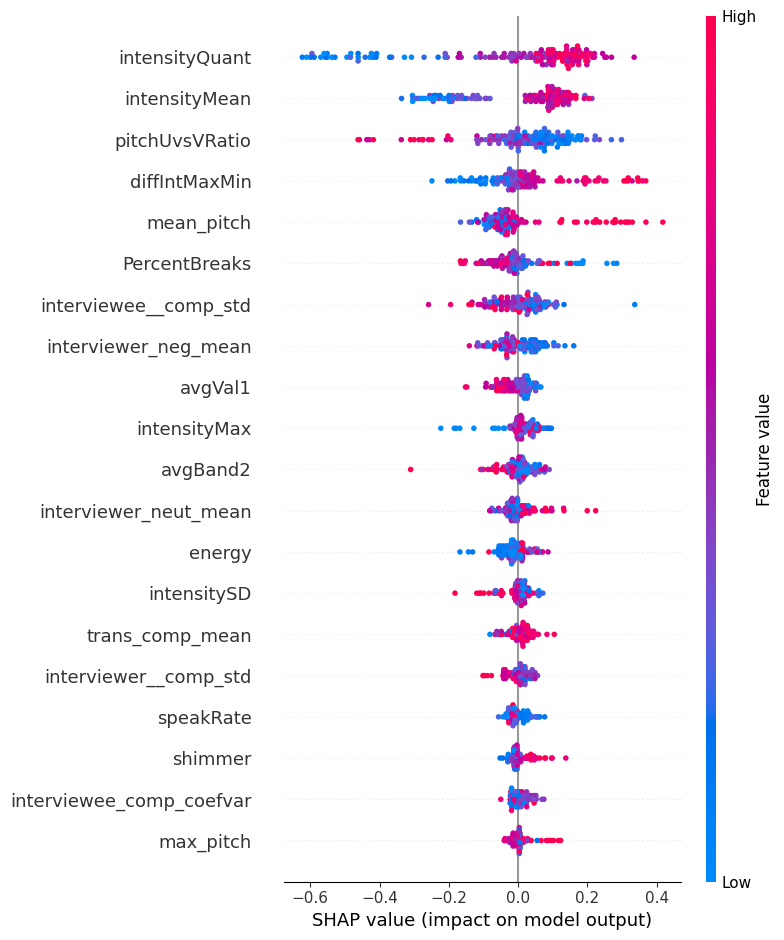


--- LIME Explanation for Deep Learning Model (excitement_score) ---
157/157 [==============================] - 0s 2ms/step


In [ ]:

import shap
import lime
import lime.lime_tabular

for target in ['overall_score', 'excitement_score']:
    print(f"\n### Model Explainability for {target.upper()} ###")

    top_semantic = select_top_features(all_features_df, semantic_list, target, 8)
    top_prosodic = select_top_features(all_features_df, prosody_features, target, 15)
    combined_features = top_semantic + top_prosodic

    X_combined = all_features_df[combined_features]
    X_prosody = all_features_df[top_prosodic]
    y = all_features_df[target]

    xgb_final_model, _, _ = train_xgboost(X_combined, X_combined, y, y)

    dl_final_model, _, _ = train_deep_learning(X_prosody, X_prosody, y, y)

    print(f"\n--- SHAP Explanation for XGBoost ({target}) ---")
    explainer_xgb = shap.TreeExplainer(xgb_final_model)
    shap_values_xgb = explainer_xgb.shap_values(X_combined)

    shap.summary_plot(shap_values_xgb, X_combined, plot_type="bar")
    shap.summary_plot(shap_values_xgb, X_combined)

    print(f"\n--- LIME Explanation for Deep Learning Model ({target}) ---")

    scaler = StandardScaler()
    X_prosody_scaled = scaler.fit_transform(X_prosody)

    lime_explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_prosody_scaled,
        feature_names=top_prosodic,
        mode='regression'
    )

    # Pick one random instance to explain
    instance_idx = np.random.randint(0, X_prosody_scaled.shape[0])
    instance = X_prosody_scaled[instance_idx]

    predict_fn = lambda data: dl_final_model.predict(data).flatten()

    lime_exp = lime_explainer.explain_instance(instance, predict_fn, num_features=10)

    # Show explanation
    lime_exp.show_in_notebook(show_table=True)



# Part F
**NOTE: Do NOT run this section;** it will just throw an error without the API secret key. The code is just included here for completeness.


In [ ]:
pip install python-dotenv
import openai
from openai import OpenAI
import ast
import os
from dotenv import load_dotenv
os.environ["OPENAI_API_KEY"] = "REDACTED"

openai.api_key = os.getenv("OPENAI_API_KEY")

def predict_score(transcript, examples):
    intro = "You are an interview assessment assistant. Given an interview transcript, predict:\n"
    intro += "- An overall performance score from 1 to 7\n"
    intro += "- An excitement score from 1 to 7\n"
    intro += "- A short explanation for your prediction\n"

    messages = [{"role": "system", "content": intro}]

    for ex in examples:
            example_text = (
                f"Transcript:\n{ex['transcript']}\n\n"
                f"Predicted Overall Score: {ex['overall_score']}\n"
                f"Predicted Excitement Score: {ex['excitement_score']}\n"
            )
            messages.append({"role": "user", "content": example_text})

    prompt_text = f"Transcript:\n{transcript}\n\nRespond with:\n- Predicted Overall Score: <float>\n- Predicted Excitement Score: <float>\n- Explanation:"
    messages.append({"role": "user", "content": prompt_text})

    try:
        response = openai.chat.completions.create(
            model='gpt-4o-mini',
            messages=messages,
            temperature=0.3,
            max_tokens=500
        )
        return response.choices[0].message.content

    except Exception as e:
        print(f"API error: {e}")
        return None

In [ ]:
examples = [
    {
        "transcript": participants['p32']['interview_1']['clean_transcript'],
        "overall_score": participants['p32']['interview_1']['overall'],
        "excitement_score": participants['p32']['interview_1']['excited'],
    },
    {
        "transcript": participants['p47']['interview_1']['clean_transcript'],
        "overall_score": participants['p47']['interview_1']['overall'],
        "excitement_score": participants['p47']['interview_1']['excited'],
    },

    {
        "transcript": participants['p65']['interview_1']['clean_transcript'],
        "overall_score": participants['p65']['interview_1']['overall'],
        "excitement_score": participants['p65']['interview_1']['excited'],
    }

]
def parser(response_text):
     # Use regex to capture the scores
    try:
        # fix to includ both integers and decimals
        score_pattern = r"[-+]?\d*\.\d+|\d+"

        overall_match = re.search(rf"Predicted Overall Score:\s*({score_pattern})", response_text, re.IGNORECASE)
        excitement_match = re.search(rf"Predicted Excitement Score:\s*({score_pattern})", response_text, re.IGNORECASE)
        explanation_match = re.search(r"Explanation:\s*(.*)", response_text, re.IGNORECASE | re.DOTALL)

        overall_score = float(overall_match.group(1)) if overall_match else None
        excitement_score = float(excitement_match.group(1)) if excitement_match else None
        explanation = explanation_match.group(1).strip() if explanation_match else None

        return {
            "predicted_overall_score": overall_score,
            "predicted_excitement_score": excitement_score,
            "model_explanation": explanation
        }

    except Exception as e:
        print(f"Parsing error: {e}")
        return {
            "predicted_overall_score": None,
            "predicted_excitement_score": None,
            "model_explanation": None

        }

In [ ]:
from tqdm import tqdm

for pid, pdata in tqdm(participants.items()):
    for ikey in ['interview_1', 'interview_2']:
        if ikey in pdata and 'clean_transcript' in pdata[ikey]:
            transcript = pdata[ikey]['clean_transcript']

            # Make API call
            raw_response = predict_score(transcript,examples)
            #raw_response = pdata[ikey]['llm_raw_response']
            if raw_response:
                # Parse response and attach
                parsed = parser(raw_response)
                pdata[ikey]['llm_prediction'] = parsed
                #print(parsed)
                pdata[ikey]['llm_raw_response'] = raw_response


In [ ]:
for pid, pdata in tqdm(participants.items()):
    for ikey in ['interview_1', 'interview_2']:
        if ikey in pdata and 'clean_transcript' in pdata[ikey]:
            transcript = pdata[ikey]['clean_transcript']


            #print(pdata[ikey]['llm_prediction'])
            print(pdata[ikey]['llm_raw_response'])

In [ ]:
def plot_llm_vs_true(participants, target, show_error=True):

    true_scores = []
    pred_scores = []
    rel_errors = []
    prediction_target = target if target != 'excited' else 'excitement'
    for pid, pdata in participants.items():
        for ikey in ['interview_1', 'interview_2']:
            interview = pdata.get(ikey, {})
            true = interview.get(target)
            pred = interview.get('llm_prediction', {}).get(f'predicted_{prediction_target}_score')

            if true is not None and pred is not None:
                true_scores.append(true)
                pred_scores.append(pred)
                rel_error = abs(pred - true) / true if true != 0 else 0
                rel_errors.append(rel_error)

    # Plot
    plt.figure(figsize=(7, 6))
    scatter = plt.scatter(true_scores, pred_scores, c=rel_errors if show_error else 'dodgerblue',
                          cmap='coolwarm', edgecolor='k', alpha=0.8, s=70)

    plt.plot([1, 7], [1, 7], '--', color='gray', label='Perfect Prediction')
    plt.xlabel(f"True {target.title()} Score")
    plt.ylabel(f"Predicted {target.title()} Score (LLM)")
    plt.title(f"LLM Predictions vs. True {target.title()} Scores")

    if show_error:
        cbar = plt.colorbar(scatter)
        cbar.set_label('Relative Error')

    plt.xlim(1, 7)
    plt.ylim(1, 7)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    return {
        "true": np.array(true_scores),
        "pred": np.array(pred_scores),
        "rel_error": np.array(rel_errors)
    }


In [ ]:
results_overall = plot_llm_vs_true(participants, target='overall', show_error=True)

results_excite = plot_llm_vs_true(participants, target='excited', show_error=True)

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import spearmanr, pearsonr

def plot_residuals(participants, target='overall'):

    true_scores = []
    pred_scores = []

    prediction_target = target if target != 'excited' else 'excitement'

    for pid, pdata in participants.items():
        for ikey in ['interview_1', 'interview_2']:
            interview = pdata.get(ikey, {})
            true = interview.get(target)
            pred = interview.get('llm_prediction', {}).get(f'predicted_{prediction_target}_score')

            if true is not None and pred is not None:
                true_scores.append(true)
                pred_scores.append(pred)

    true_scores = np.array(true_scores)
    pred_scores = np.array(pred_scores)
    residuals = pred_scores - true_scores


    mae = mean_absolute_error(true_scores, pred_scores)
    mse = mean_squared_error(true_scores, pred_scores)
    r2 = r2_score(true_scores, pred_scores)
    spearman_rho, spearman_p = spearmanr(true_scores, pred_scores)
    pearson_r, pearson_p = pearsonr(true_scores, pred_scores)

    # Print stats
    print(f"\nEvaluation for {target.title()} Score")
    print(f"MAE:       {mae:.4f}")
    print(f"MSE:       {mse:.4f}")
    print(f"R²:        {r2:.4f}")
    print(f"Spearman ρ: {spearman_rho:.4f} (p = {spearman_p:.4f})")
    print(f"Pearson r:  {pearson_r:.4f} (p = {pearson_p:.4f})")

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(true_scores, residuals, alpha=0.7, color='purple', edgecolor='k')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.xlabel(f"True {target.title()} Score")
    plt.ylabel("Residual (Predicted - True)")
    plt.title(f"Residual Plot for LLM Predictions ({target.title()})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        "true": true_scores,
        "pred": pred_scores,
        "residuals": residuals,
        "mae": mae,
        "mse": mse,
        "r2": r2,
        "spearman_rho": spearman_rho,
        "spearman_p": spearman_p,
        "pearson_r": pearson_r,
        "pearson_p": pearson_p
    }


residuals_overall = plot_residuals(participants, target='overall')
residuals_excited = plot_residuals(participants, target='excited')
